### ANLY561 Homework 6
### Hongyang Zheng

#### Question 1.

In [11]:
# function for backtracking
def backtracking(xi,yi,x0,dx,f,df0,alpha=0.2,beta=0.8,verbose=False):
        
    delta=alpha*np.sum(dx*df0)
    t=1
    f0= f(xi,yi,x0)
    x=x0+dx
    fx=f(xi,yi,x)
    #print(fx)
    while (not np.isfinite(fx)) or fx>f0+delta*t:
        #print(fx)
        t=beta*t
        x=x0+t*dx
        fx= f(xi,yi,x)
        #print(x)
            
    return x       

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


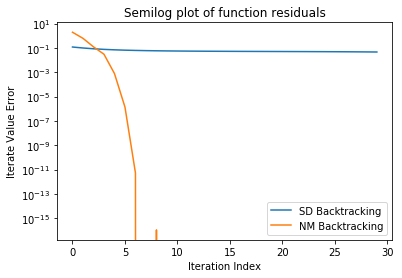

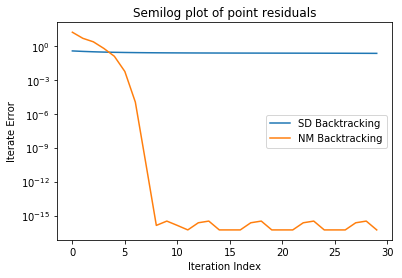

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# function logistic_objective
def logistic_objective(x,y,b):
        L0=0
        N=len(x)
        i=0
        while i < N:
            L0=L0+np.log(1+np.exp(-y[i]*(b[1]*x[i] + b[0]))) 
            i=i+1
        return L0/10
    
# function dlogistic_objective    
def dlogistic_objective(x,y,b):
        G0=0
        G1=0
        N=len(x)
        i=0
        while i < N:
            s=np.exp(-y[i]*(b[1]*x[i]+b[0]))
            G0=G0+(s*-y[i])/(1+s)
            G1=G1+(s*-y[i]*x[i])/(1+s)
            i=i+1
        return np.array([G0/10,G1/10])

# function d2logistic_objective
def d2logistic_objective(x,y,b):
        df11=0
        df12=0
        df21=0
        df22=0
        N=len(x)
        i=0
        while i < N:
            s=np.exp(-y[i]*(b[1]*x[i]+b[0]))
            df11=df11+(s*(y[i])**2)/((1+s)**2)
            df12=df12+(s*x[i]*(y[i])**2)/((1+s)**2)
            df21=df21+(s*x[i]*(y[i])**2)/((1+s)**2)
            df22=df22+(s*(x[i]**2)*(y[i])**2)/((1+s)**2)
            i=i+1
        return np.array([[df11/10,df12/10],[df21/10,df22/10]])

# load data
X=[-1,-1,-1,0,0,0,1,1,1,1]
Y=[-1,-1,-1,1,-1,1,1,1,1,-1] 
# initial point b0
b0 = np.array([10, 10])

iter = 30 
alpha = 0.2
beta = 0.8


#### backtracking of gradient
x_sd_bt = [b0]
fb0 = logistic_objective(X,Y,b0)
f_sd_bt = [fb0] 
x = b0 

for i in range(iter): 
    dfb = dlogistic_objective(X,Y,x)
    fb =  logistic_objective(X,Y,x)   
    x = backtracking(X,Y,x, -dfb, logistic_objective, dfb)     
    x_sd_bt.append(x) 
    fb =  logistic_objective(X,Y,x) 
    f_sd_bt.append(fb) 

# calculate difference 
dx_sd_bt = []
df_sd_bt=[]
for i in range(0,30):
    d1 = f_sd_bt[i+1]-f_sd_bt[i]
    
    d2 = x_sd_bt[i+1]-x_sd_bt[i]
    d2 = (d2[0]**2+d2[1]**2)**0.5
    
    df_sd_bt.append(d1) 
    dx_sd_bt.append(d2)
    
#### backtracking of newton
x_nm_bt = [b0] 
fb0 =   logistic_objective(X,Y,b0)
f_nm_bt = [fb0] 
x = b0 

for i in range(iter): 
    d2fb =  d2logistic_objective(X,Y,x)
    dfb =  dlogistic_objective(X,Y,x)
    dx_newt = - np.linalg.solve(d2fb, dfb)
    fb =  logistic_objective(X,Y,x)
    
    x = backtracking(X,Y,x,dx_newt, logistic_objective, dfb)     
    x_nm_bt.append(x) 
    fb =  logistic_objective(X,Y,x)     
    f_nm_bt.append(fb)      

# calculate difference
dx_nm_bt = []
df_nm_bt=[]
for i in range(0,30):
    d3 = f_nm_bt[i+1]-f_nm_bt[i]
    
    d4 = x_nm_bt[i+1]-x_nm_bt[i]
    d4 = (d4[0]**2+d4[1]**2)**0.5

    df_nm_bt.append(d3)  
    dx_nm_bt.append(d4)

## function residuals
sd_bt, = plt.semilogy(np.abs(df_sd_bt), label='SD Backtracking') 
nm_bt, = plt.semilogy(np.abs(df_nm_bt), label='NM Backtracking') 

plt.xlabel('Iteration Index') 
plt.ylabel('Iterate Value Error') 
plt.legend(handles=[sd_bt, nm_bt]) 
plt.legend(handles=[sd_bt, nm_bt]) 
plt.title('Semilog plot of function residuals') 
plt.show()


## point residuals
sd_bt, = plt.semilogy(np.abs(dx_sd_bt), label='SD Backtracking') 
nm_bt, = plt.semilogy(np.abs(dx_nm_bt), label='NM Backtracking') 

plt.xlabel('Iteration Index') 
plt.ylabel('Iterate Error') 
plt.legend(handles=[sd_bt, nm_bt,]) 
plt.legend(handles=[sd_bt, nm_bt,]) 
plt.title('Semilog plot of point residuals') 
plt.show() 

#### Question 2
##### a.
$f(x,y)=2x+3y$, $h_1=x-1$, $h_2=-x-1$, $h_3=y-1$, $h_4=-y-1$

1.(Stationarity) $\left\lgroup\begin{matrix}2 \cr 3\end{matrix}\right\rgroup+\lambda_1\left\lgroup\begin{matrix}1 \cr 0\end{matrix}\right\rgroup+\lambda_2\left\lgroup\begin{matrix}-1 \cr 0\end{matrix}\right\rgroup+\lambda_3\left\lgroup\begin{matrix}0 \cr 1\end{matrix}\right\rgroup+\lambda_4\left\lgroup\begin{matrix}0 \cr -1\end{matrix}\right\rgroup=\left\lgroup\begin{matrix}0 \cr 0\end{matrix}\right\rgroup$

2.(Primal Feasibility) $h_1=x^*-1\leqslant0$, $h_2=-x^*-1\leqslant0$, $h_3=y^*-1\leqslant0$, $h_4=-y^*-1\leqslant0$

3.(Dual Feasibility) $\lambda_1\geqslant0$, $\lambda_2\geqslant0$, $\lambda_3\geqslant0$, $\lambda_4\geqslant0$

4.(Complementary Slackness) $\lambda_1(x^*-1)=\lambda_2(-x^*-1)=\lambda_3(y^*-1)=\lambda_4(-y^*-1)=0$

##### b.
To satisfy stationarity, $\lambda_1-\lambda_2=-2$ and $\lambda_3-\lambda_4=-3$
###### i.
When $x=-1, y=-1$, $\lambda_1=\lambda_3=0$ and therefore, $\lambda_2=2, \lambda_4=3$

1.(Stationarity) $\left\lgroup\begin{matrix}2 \cr 3\end{matrix}\right\rgroup+0\left\lgroup\begin{matrix}1 \cr 0\end{matrix}\right\rgroup+2\left\lgroup\begin{matrix}-1 \cr 0\end{matrix}\right\rgroup+0\left\lgroup\begin{matrix}0 \cr 1\end{matrix}\right\rgroup+3\left\lgroup\begin{matrix}0 \cr -1\end{matrix}\right\rgroup=\left\lgroup\begin{matrix}0 \cr 0\end{matrix}\right\rgroup$

2.(Primal Feasibility) $h_1=x^*-1=-2\leqslant0$, $h_2=-x^*-1=0\leqslant0$, $h_3=y^*-1=-2\leqslant0$, $h_4=-y^*-1=0\leqslant0$

3.(Dual Feasibility) $\lambda_1\geqslant0$, $\lambda_2\geqslant0$, $\lambda_3\geqslant0$, $\lambda_4\geqslant0$

4.(Complementary Slackness) $\lambda_1(x^*-1)=\lambda_2(-x^*-1)=\lambda_3(y^*-1)=\lambda_4(-y^*-1)=0$

Therefore point $(-1,-1)$ satisfy all KKT conditions.

###### ii.
When $x=-1, y=1$, $\lambda_1=\lambda_4=0$ and therefore, $\lambda_2=2, \lambda_3=-3$

Dual Feasibility does not satisfy since $\lambda_3=-3<0$. 

###### iii.
When $x=1, y=-1$, $\lambda_2=\lambda_3=0$ and therefore, $\lambda_1=-2, \lambda_4=3$

Dual Feasibility does not satisfy since $\lambda_1=-2<0$. 

###### iv.
When $x=1, y=1$, $\lambda_2=\lambda_4=0$ and therefore, $\lambda_1=-2, \lambda_3=-3$

Dual Feasibility does not satisfy since $\lambda_1=-2<0, \lambda_3=-3<0$. 

1.(Stationarity) $\left\lgroup\begin{matrix}2 \cr 3\end{matrix}\right\rgroup+-2\left\lgroup\begin{matrix}1 \cr 0\end{matrix}\right\rgroup+0\left\lgroup\begin{matrix}-1 \cr 0\end{matrix}\right\rgroup+-3\left\lgroup\begin{matrix}0 \cr 1\end{matrix}\right\rgroup+0\left\lgroup\begin{matrix}0 \cr -1\end{matrix}\right\rgroup=\left\lgroup\begin{matrix}0 \cr 0\end{matrix}\right\rgroup$

2.(Primal Feasibility) $h_1=x^*-1=0\leqslant0$, $h_2=-x^*-1=-2\leqslant0$, $h_3=y^*-1=0\leqslant0$, $h_4=-y^*-1=-2\leqslant0$

4.(Complementary Slackness) $\lambda_1(x^*-1)=\lambda_2(-x^*-1)=\lambda_3(y^*-1)=\lambda_4(-y^*-1)=0$

Therefore, $(1,1)$ satisfies all the KKT conditions except dual feasibility.

###### v.
When points are in the interior area, $\lambda_1=\lambda_2=\lambda_3=\lambda_4=0$

Stationarity does not satisfy.

###### vi.
When x=1, $\lambda_2=\lambda_3=\lambda_4=0$.

Stationarity does not satisfy.

###### vii.
When x=-1, $\lambda_1=\lambda_3=\lambda_4=0$.

Stationarity does not satisfy.

###### viii.
When y=1, $\lambda_1=\lambda_2=\lambda_4=0$.

Stationarity does not satisfy.

###### ix.
When y=-1, $\lambda_1=\lambda_2=\lambda_3=0$.

Stationarity does not satisfy.

Overall, $(-1,-1)$ is the only point which satisfies the KKT conditions, and $(1,1)$ satisfies all KKT conditions except dual feasibility.

##### c.
When $x=0, -1\leqslant0\leqslant1$, when $y=0, -1\leqslant0\leqslant1$. Therefore, point $(0,0)$ is an interior point.

The python program is:

In [1]:
import numpy as np


def lb1D(x, a, b):    
    return -np.log(x[0]-a)-np.log(b-x[0])-np.log(x[1]-a)-np.log(b-x[1])

def dlb1D(x, a, b):    
    return np.array([ 1/(b-x[0]) - 1/(x[0]-a),1/(b-x[1]) - 1/(x[1]-a)])

def d2lb1D(x, a, b):
    return np.array([[1/((b-x[0])**2) + 1/((x[0]-a)**2),0],[0,1/((b-x[1])**2) + 1/((x[1]-a)**2)]])


def backtracking2(x0,dx,f,df0,alpha=0.2,beta=0.8,verbose=False):
    if verbose:
        n=0
        xs=[x0+dx]*3
        
        
    delta=alpha*np.sum(dx*df0)
    t=1
    f0=f(x0)
    x=x0+dx
    fx=f(x)
    
    while (not np.isfinite(fx)) or fx>f0+delta*t:

        t=beta*t
        x=x0+t*dx
        fx=f(x)

        
        if verbose:
            n=n+1
            xs.append(x)
            xs.pop(0)
       
    return x       

def log_barrier_opt_1D(a, b, x0, f, d1f, d2f, al=0.2, be=0.8, M=10, init_iter=5, out_iter=5, in_iter=3, verbose=False):
    
    # First, approximate the solution with t=1
    x = x0
    if verbose:
        pts = [x0]
    
    # Centering step
    for i in range(init_iter):
        flb = lambda z: f(z) + lb1D(z, a, b)
        d1fb0 = d1f(x) + dlb1D(x, a, b)
        d2fb0 = d2f(x) + d2lb1D(x, a, b)
        dx_newt = - np.linalg.solve(d2fb0, d1fb0)

        x = backtracking2(x, dx_newt, flb, d1fb0, alpha=al, beta=be)
       
        if verbose:
            pts.append(x)
                   
    # Now begin the outer iterations
    t=1
    for i in range(out_iter):
        t = M * t
        if verbose:
            pts = [x]
        for j in range(in_iter):
            flb = lambda z: f(z) + lb1D(z, a, b)/t
            d1fb0 = d1f(x) + dlb1D(x, a, b)/t
            d2fb0 = d2f(x) + d2lb1D(x, a, b)/t
            dx_newt = - np.linalg.solve(d2fb0, d1fb0)

            x = backtracking2(x, dx_newt, flb, d1fb0, alpha=al, beta=be)

    return x
                                                            
a= -1
b= 1
                              
x0=np.array([0,0])
f=lambda x: 2*x[0]+3*x[1]
d1f=lambda x: np.array([2,3])
d2f= lambda x: np.array([[0,0],[0,0]])

x = log_barrier_opt_1D(a, b, x0, f, d1f,d2f, verbose=True, out_iter=5)
print(x)

[-0.99999501 -0.99999683]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [ ]:
x0=x
v=np.array([x0[0],x0[1]])



def l2(x):
    return np.sqrt(np.sum(x**2))




f3 = lambda x: np.reshape(np.sum((x-1)**2), (1, 1)) # Reshape coerces dimension for block
df3 = lambda x: 2*(x-1)
d2f3 = lambda x: 2*np.eye(2)

h = lambda x: np.reshape(np.sum(x**2)-1, (1, 1))
dh = lambda x: 2*x
d2h = lambda x: 2*np.eye(2)

phi = lambda x, mu, t:  np.concatenate((df(x)+mu*dh(x),-mu*h(x)-1/t))
dphi = lambda x, mu: np.reshape(np.block([[d2f(x) + mu*d2h(x), dh(x)], [-np.diag(mu)@dh(x).T, -np.array([h(x)])]]), (d+m, d+m)) 
# block is new in numpy 1.13.0

def diagnostic(d, x, mu, t, dx_mu):
    n = 100
    s = np.linspace(0, 1.0, n)
    vals = np.zeros(n)
    for i in range(n):
        vals[i] = l2(phi(x + s[i]*dx_mu[:d], mu + s[i]*dx_mu[d:], t))
        
    plt.plot(s, vals)
    plt.show()
    

num_iter = 10
d = 2 # dimension of the program
m = 1 # number of inequality constraints
x0 = 0.0*np.ones((2,1)) # initial values for x_1, x_2 -- dimension is coerced to ensure column vector format
mu0 = -1/h(x0) # initial value for mu


nu = 10 # Interior point scaling parameter

# Backtracking parameters
alpha = 0.1
beta = 0.5

eta = lambda x, mu: -h(x)*mu # Computation of surrogate duality gap

x = x0
mu = mu0
for i in range(num_iter):
    t = nu * m / eta(x, mu)
    phi0 = phi(x,mu,t)
    norm_phi0 = l2(phi0)
    print(t)
    print(norm_phi0)
    
    # Compute the Newton search direction

    dx_mu = np.linalg.solve(dphi(x, mu), -phi0)
    
    # Initialize backtracking
    s = 1 # using s for backtracking parameter since t is taken
    yx = x + s*dx_mu[:d]
    ymu = mu + s*dx_mu[d:]
    hyx = h(yx)
    phiy = phi(yx, ymu, t)
    norm_phiy = l2(phiy)
    
    diagnostic(d, x, mu, t, dx_mu)
    
    while 0 < ymu[ymu<=0].size or 0 < hyx[0<=hyx].size or (1-alpha*s)*norm_phi0 < norm_phiy:
        s = beta * s
        yx = x + s*dx_mu[:d]
        ymu = mu + s*dx_mu[d:]
        hyx = h(yx)
        phiy = phi(yx, ymu, t)
        norm_phiy = l2(phiy)
        
    x = yx
    mu = ymu
    
print('Numerical solution after %d steps:' % num_iter)
print(x)
print(mu)

print('Actual solution:')
print(np.ones(2)/np.sqrt(2))
print(np.sqrt(2)-1)